# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

Uncomment in case two students are doing the assignment together:

---

----

In [6]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/avocado.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,Date,AveragePrice,total_sold,small_sold,large_sold,sma,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
total_sold      float64
small_sold      float64
large_sold      float64
sma             float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# Q1 

תרגיל 1: יצרתי טבלה שסוכמת את המכירות לפי שנה בכל איזור

In [8]:
data.groupby(['region','year'])['total_sold'].sum().unstack()


year,2015,2016,2017,2018
region,,,,
Albany,4.029896e+06,5.264336e+06,5.231582e+06,1.541986e+06
Atlanta,2.323170e+07,2.832688e+07,2.881512e+07,8.231422e+06
BaltimoreWashington,4.064558e+07,4.089380e+07,4.101563e+07,1.215890e+07
Boise,3.784357e+06,4.653510e+06,4.760561e+06,1.214760e+06
Boston,2.745499e+07,3.057132e+07,3.061067e+07,8.637006e+06
BuffaloRochester,5.893235e+06,7.205112e+06,7.740306e+06,2.123818e+06
California,3.014074e+08,3.261884e+08,3.176445e+08,8.374131e+07
Charlotte,9.487343e+06,1.058672e+07,1.189559e+07,3.585890e+06
Chicago,4.149472e+07,3.961264e+07,4.098075e+07,1.161423e+07


# Q2

תרגיל 2: יצרתי דאטה חדשה שמתחילה באות של השם שלי
ואז נקיתי את הנתונים ולקחתי רק  את הנתונים ששייכים לשנת 2016
והצגתי את השורות האחרונות כדי לראןת כמה שורות יש סה"כ


In [9]:
new_dt=data[(data['region'].str.contains("MiamiFtLauderdale"))]
new_dt2=new_dt[new_dt.loc[:,'year']==2016]
new_dt2.tail()

,Unnamed: 0,Date,AveragePrice,total_sold,small_sold,large_sold,sma,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
13228,47,31/01/2016,1.54,1844.79,804.36,0.00,0.0,1040.43,1040.43,0.00,0.0,organic,2016,MiamiFtLauderdale
13229,48,24/01/2016,1.42,3020.48,843.92,9.03,0.0,2167.53,2167.53,0.00,0.0,organic,2016,MiamiFtLauderdale
13230,49,17/01/2016,1.49,2528.26,903.01,6.46,0.0,1618.79,1613.05,5.74,0.0,organic,2016,MiamiFtLauderdale
13231,50,10/01/2016,1.52,4664.60,2068.15,32.27,0.0,2564.18,1341.37,1222.81,0.0,organic,2016,MiamiFtLauderdale
13232,51,03/01/2016,1.24,15211.54,7202.50,76.06,0.0,7932.98,4887.58,3045.40,0.0,organic,2016,MiamiFtLauderdale


# Q3

תרגיל 3: חישבתי ממוצע מכירות של הדאטה החדשה

In [10]:
new_dt2['total_sold'].mean() 

306587.12009615387

# Q4

תרגיל 4: הפכתי את העמודה של התאריך
ל-דייטיים
ואז התייחסתי רק לחודשים ויצרתי השמה כדי להשתמש רק בחודש ספטמבר וביצעתי סכימה של העמודה


In [11]:
new_dt['Date']=pd.to_datetime(new_dt.Date)
new_dt['month'] = pd.DatetimeIndex(new_dt.Date).month
sep=new_dt[new_dt.month==9]
sep['Total Bags'].sum()

<ipython-input-11-3ba471495ef4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dt['Date']=pd.to_datetime(new_dt.Date)
<ipython-input-11-3ba471495ef4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dt['month'] = pd.DatetimeIndex(new_dt.Date).month


1285995.95

# Q5

 תרגיל 5:השוותי בין סוגי האבוקדו והצגתי על ידי גרף מאיזה סוג נמכרו יותר

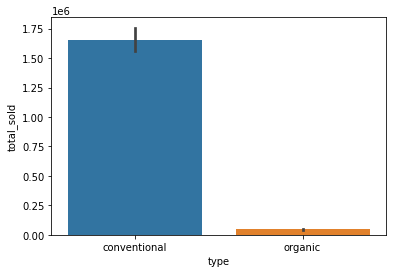

In [12]:
 sns.barplot(data=data, x="type", y="total_sold")

# Q6

תרגיל 6: הפכתי את העמודה של הטייפ עם פקודה של קאטקודס כדי שתהיה מספרית 
    ואז ביצעתי קורלציה

In [13]:
features = ['total_sold', 'Total Bags', 'AveragePrice', 'type']

# continue here
data['type']=data['type'].astype('category').cat.codes

In [14]:
features = ['total_sold', 'Total Bags', 'AveragePrice', 'type']
data[features].corr(method='spearman')


,total_sold,Total Bags,AveragePrice,type
total_sold,1.000000,0.952550,-0.612239,-0.808466
Total Bags,0.952550,1.000000,-0.596972,-0.754680
AveragePrice,-0.612239,-0.596972,1.000000,0.643803
type,-0.808466,-0.754680,0.643803,1.000000


# Q7

תרגיל 7:
ביצעתי סקאטר פלוט על הקורלציה הכי גבוהה

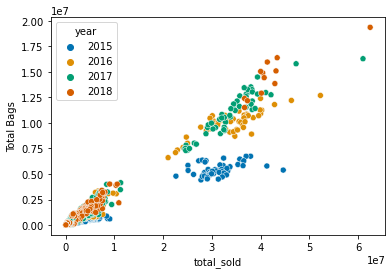

In [15]:
sns.scatterplot(data=data, x="total_sold", y="Total Bags", hue ='year', palette ='colorblind')


---
# GOOD LUCK !!!!
---

In [16]:
# do not type below this line

שאלות נוספות

In [17]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
total_sold      0
small_sold      0
large_sold      0
sma             0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

לא קיימים ערכים חסרים בדאטה, אך אם היו קיימים הייתי ממלא אותם כך לפי ממוצע

data['העמודה שלה אני מכניס את הערך החסר'].fillna(data['העמודה שלה אני מכניס את הערך החסר'].mean(),inplace=True)

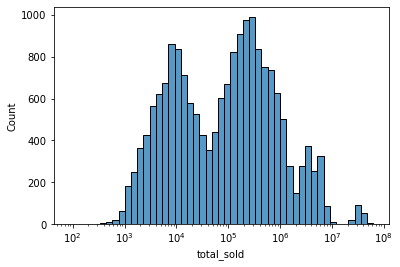

In [25]:
sns.histplot(data=data.total_sold ,log_scale = True)

In [26]:
data.groupby(['type','year'])['AveragePrice'].mean().unstack()

year,2015,2016,2017,2018
type,,,,
0,1.077963,1.105595,1.294888,1.127886
1,1.673324,1.571684,1.735521,1.567176


In [27]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
total_sold      float64
small_sold      float64
large_sold      float64
sma             float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type               int8
year              int64
region           object
dtype: object

In [28]:
data["region"]=data["region"].astype("category").cat.codes

In [29]:
data.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
total_sold      float64
small_sold      float64
large_sold      float64
sma             float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type               int8
year              int64
region             int8
dtype: object

In [30]:
features = ['Total Bags','AveragePrice','type','region']
X = data[features]
y = data['total_sold']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1)
model = DecisionTreeRegressor(random_state=1)

In [31]:
model.fit(X_train,y_train)
pred=model.predict(X_test)
mse(pred,y_test,squared=False)


571531.7486135387